In [ ]:
#| default_exp datasets.external
#| default_cls_lvl 3

In [ ]:
#| export
from fastai.data.all import *

from tsfast.data import *
from tsfast.datasets.core import *

import identibench as idb
from shutil import rmtree

In [ ]:
#| export
def get_default_dataset_path():
    "Create a directory in the user's home directory for storing datasets"
    data_dir = Path.home() / '.tsfast' / 'datasets'
    data_dir.mkdir(parents=True, exist_ok=True)
    return data_dir

In [ ]:
get_default_dataset_path()

Path('/Users/daniel/.tsfast/datasets')

In [ ]:
#| export
def get_dataset_path():
    "Retrieves the tsfast dataset directory. Tries to read the path in the environment variable 'TSFAST_PATH', returns the default otherwise."
    env_var_name = 'TSFAST_PATH'
    env_path = os.getenv(env_var_name)

    if env_path:
        return Path(env_path)
    else:
        return get_default_dataset_path()

In [ ]:
env_path = '/directory/.tsfast/'
os.environ['TSFAST_PATH'] = env_path
test_eq(get_dataset_path(),Path(env_path))
get_dataset_path()

Path('/directory/.tsfast')

In [ ]:
os.environ['TSFAST_PATH'] = ''
get_dataset_path()

Path('/Users/daniel/.tsfast/datasets')

In [ ]:
#| export
def clean_default_dataset_path():
    "Removes the default directory where the datasets are stored"
    rmtree(get_default_dataset_path())

In [ ]:
#| export
@delegates(create_dls, keep=True)
def create_dls_downl(
    dataset=None,#path to the dataset directory, if not provided uses default
    download_function=None,# function 
    **kwargs
):
    if dataset is None and download_function is not None:
        dataset = get_dataset_path() / download_function.__name__
    else:
        dataset = Path(dataset)

    if not is_dataset_directory(dataset):
        if download_function is not None:
            print(f'Dataset not found. Downloading it to "{dataset}"')
            download_function(dataset)
        else:
            raise ValueError(f'{dataset} does not contain a dataset. Check the path or activate the download flag.')

    return create_dls(dataset=dataset,**kwargs)

In [ ]:
# #| export
# @delegates(create_dls_downloadable,keep=True)
# def create_dls_wh(
#     dataset,
#     win_sz=100,
#     **kwargs):
#     'Dataloader for Wienerhammerstein Benchmark'
#     return create_dls_downloadable(dataset,
#         download_function=wiener_hammerstein,
#         u=['u0'],
#         y=['y0'],
#         **kwargs)

### Wiener Hammerstein Benchmark Dataset

In [ ]:
#| export
create_dls_wh = partial(
    create_dls_downl, 
    download_function=idb.datasets.workshop.dl_wiener_hammerstein,
    u=['u0'],y=['y0'],
    win_sz=200,
    max_batches_training=1000,
    max_batches_valid=100,
    valid_stp_sz=30
)

create_dls_wh_prediction = partial(
    create_dls_downl, 
    download_function=idb.datasets.workshop.dl_wiener_hammerstein,
    u=['u0'],y=['y0'],
    win_sz=200,
    prediction=True
)

Dataset not found. Downloading it to "/Users/daniel/.tsfast/datasets/dl_wiener_hammerstein"


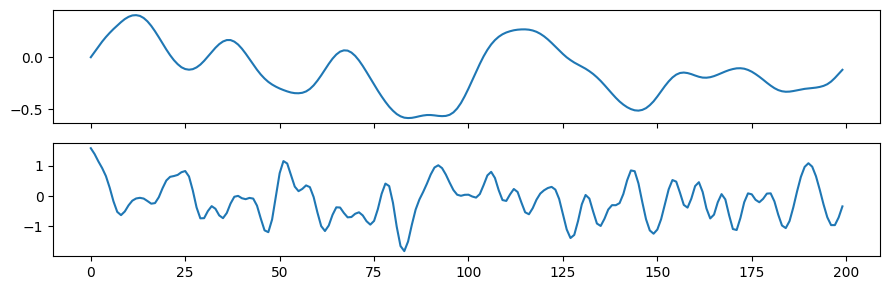

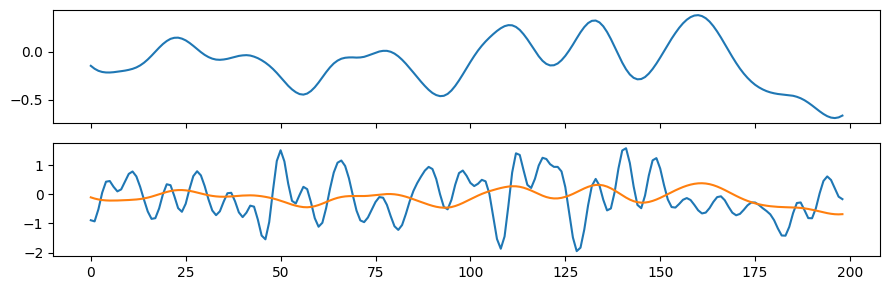

In [ ]:
dls = create_dls_wh()
dls.show_batch(max_n=1)
dls = create_dls_wh_prediction()
dls.show_batch(max_n=1)

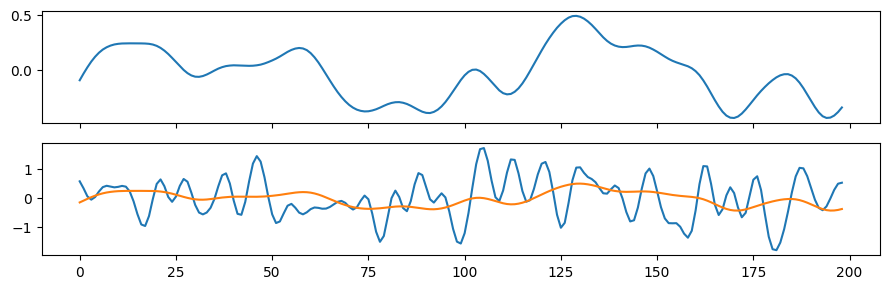

In [ ]:
dls[-1].show_batch(max_n=1)

### Silverbox Benchmark Dataset

In [ ]:
#| export
create_dls_silverbox = partial(
    create_dls_downl, 
    download_function=idb.datasets.workshop.dl_silverbox,
    u=['u0'],y=['y0'],
    win_sz=200,
    max_batches_training=1000,
    max_batches_valid=100,
    valid_stp_sz=30
)

create_dls_silverbox_prediction = partial(
    create_dls_downl, 
    download_function=idb.datasets.workshop.dl_silverbox,
    u=['u0'],y=['y0'],
    win_sz=200,
    prediction=True
)

Dataset not found. Downloading it to "/Users/daniel/.tsfast/datasets/dl_silverbox"


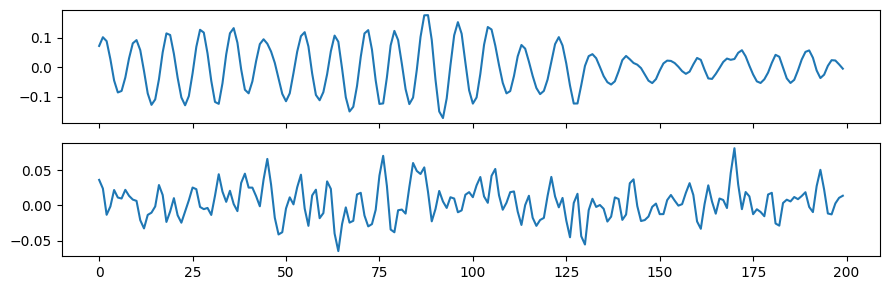

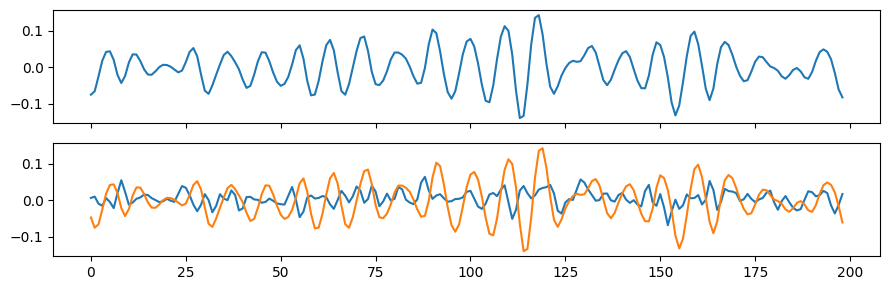

In [ ]:
dls = create_dls_silverbox()
dls.show_batch(max_n=1)
dls = create_dls_silverbox_prediction()
dls.show_batch(max_n=1)

### Cascaded Tanks Benchmark Dataset

In [ ]:
#| export
create_dls_cascaded_tanks = partial(
    create_dls_downl, 
    download_function=idb.datasets.workshop.dl_cascaded_tanks,
    u=['u0'],y=['y0'],
    win_sz=150,
    bs=16,
    stp_sz=1
)

create_dls_cascaded_tanks_prediction = partial(
    create_dls_downl, 
    download_function=idb.datasets.workshop.dl_cascaded_tanks,
    u=['u0'],y=['y0'],
    win_sz=50,
    prediction=True
)

In [ ]:
dls = create_dls_cascaded_tanks()
len(dls.items)

Dataset not found. Downloading it to "/Users/daniel/.tsfast/datasets/dl_cascaded_tanks"


715

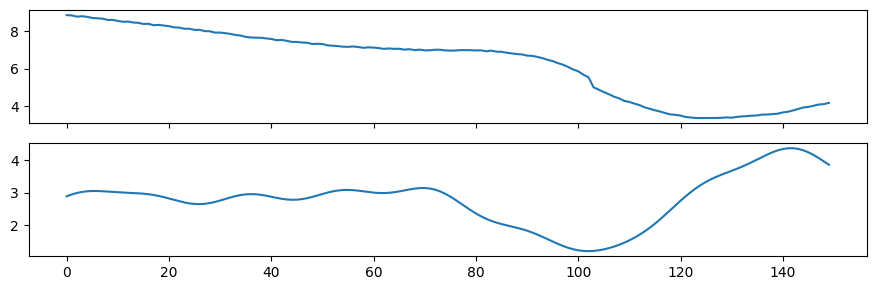

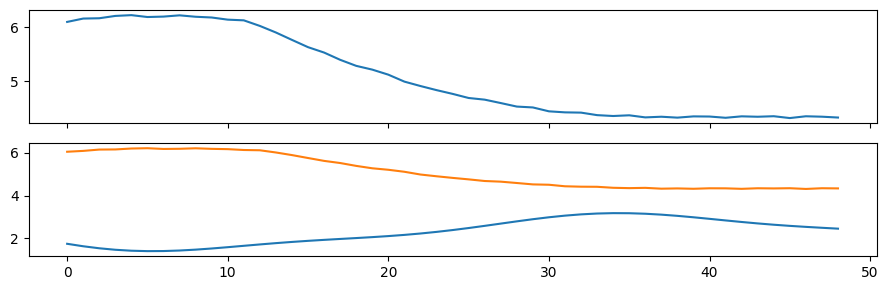

In [ ]:
dls = create_dls_cascaded_tanks()
dls.show_batch(max_n=1)
dls = create_dls_cascaded_tanks_prediction()
dls.show_batch(max_n=1)

### EMPS Benchmark Dataset

In [ ]:
#| export
create_dls_emps = partial(
    create_dls_downl, 
    download_function=idb.datasets.workshop.dl_emps,
    u=['u0'],y=['y0'],
    win_sz=1000,
)

create_dls_emps_prediction = partial(
    create_dls_downl, 
    download_function=idb.datasets.workshop.dl_emps,
    u=['u0'],y=['y0'],
    win_sz=500,
    prediction=True
)

Dataset not found. Downloading it to "/Users/daniel/.tsfast/datasets/dl_emps"


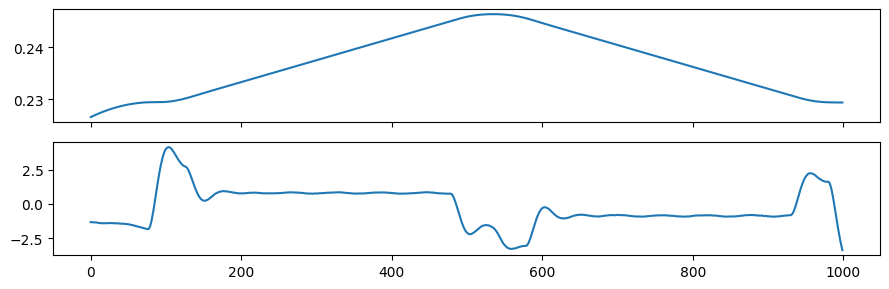

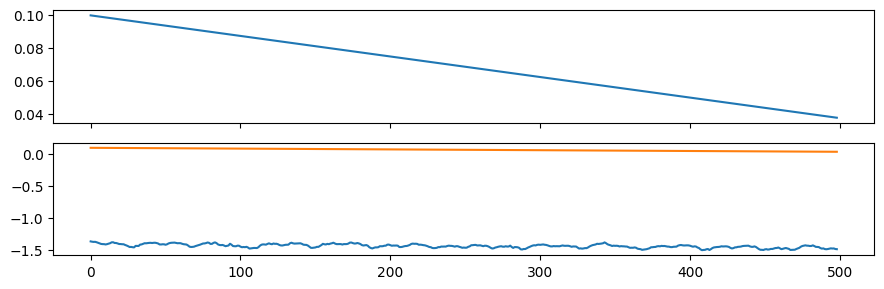

In [ ]:
dls = create_dls_emps()
dls.show_batch(max_n=1)
dls = create_dls_emps_prediction()
dls.show_batch(max_n=1)

### CED Benchmark Dataset

In [ ]:
#| export
create_dls_ced = partial(
    create_dls_downl, 
    download_function=idb.datasets.workshop.dl_ced,
    u=['u0'],y=['y0'],
    win_sz=100,
    bs=16,
    stp_sz=1
)

create_dls_ced_prediction = partial(
    create_dls_downl, 
    download_function=idb.datasets.workshop.dl_ced,
    u=['u0'],y=['y0'],
    win_sz=100,
    bs=16,
    stp_sz=1,
    prediction=True
)

Dataset not found. Downloading it to "/Users/daniel/.tsfast/datasets/dl_ced"


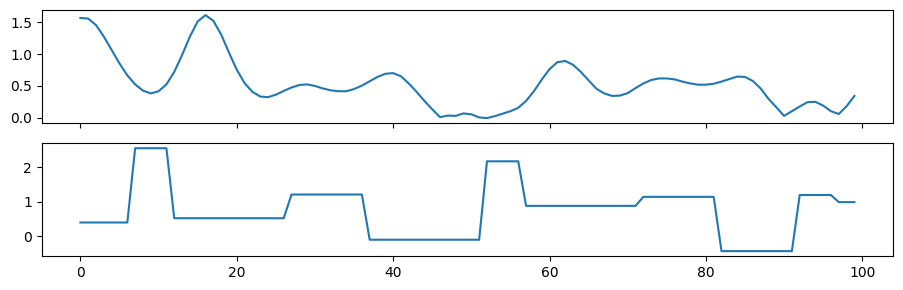

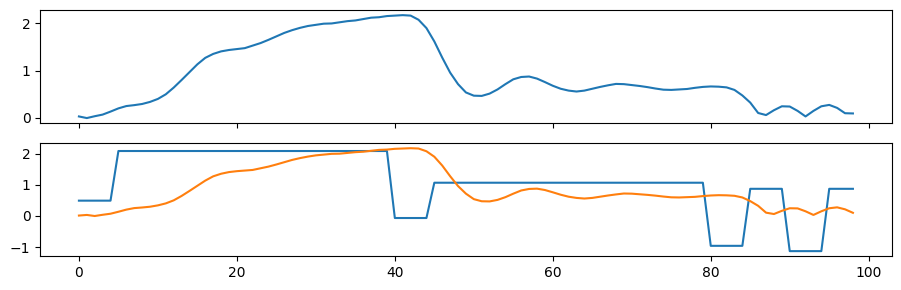

In [ ]:
dls = create_dls_ced()
dls.show_batch(max_n=1)
dls = create_dls_ced_prediction()
dls.show_batch(max_n=1)

### Wiener Hammerstein with Process Noise Benchmark Dataset

In [ ]:
#| export
create_dls_noisy_wh = partial(
    create_dls_downl, 
    download_function=idb.datasets.workshop.dl_noisy_wh,
    u=['u0'],y=['y0'],
    win_sz=100,
    stp_sz=50
)

create_dls_noisy_wh_prediction = partial(
    create_dls_downl, 
    download_function=idb.datasets.workshop.dl_noisy_wh,
    u=['u0'],y=['y0'],
    win_sz=100,
    stp_sz=50,
    prediction=True
)

Dataset not found. Downloading it to "/Users/daniel/.tsfast/datasets/dl_noisy_wh"


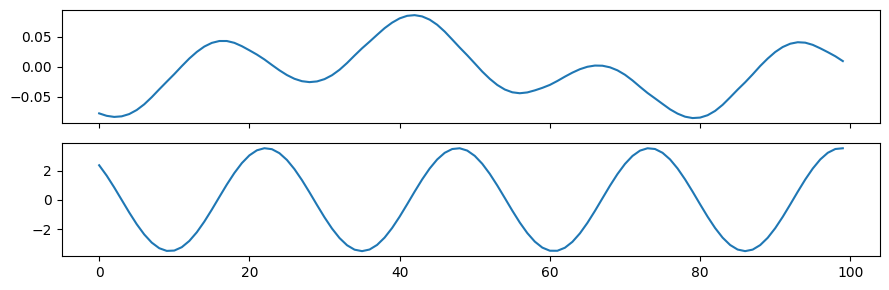

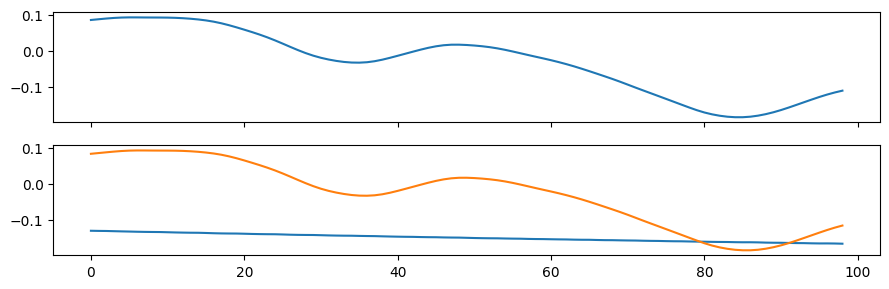

In [ ]:
dls = create_dls_noisy_wh()
dls.show_batch(max_n=1)
dls = create_dls_noisy_wh_prediction()
dls.show_batch(max_n=1)

### Industrial Robot Benchmark Dataset

In [ ]:
#| exporti
robot_u_forward = [f'u{i}' for i in range(6)]
robot_u_inverse = [f'u{i}' for i in range(18)]
robot_y = [f'y{i}' for i in range(6)]

In [ ]:
#| export
u = [f'u{i}' for i in range(6)]
y = [f'y{i}' for i in range(6)]

create_dls_robot_forward = partial(
    create_dls_downl, 
    download_function=idb.datasets.industrial_robot.dl_robot_forward,
    u=robot_u_forward,y=robot_y,
    win_sz=300,
    valid_stp_sz=4,
)

create_dls_robot_forward_prediction = partial(
    create_dls_downl, 
    download_function=idb.datasets.industrial_robot.dl_robot_forward,
    u=robot_u_forward,y=robot_y,
    win_sz=250,
    valid_stp_sz=4,
    prediction=True
)

Dataset not found. Downloading it to "/Users/daniel/.tsfast/datasets/dl_robot_forward"


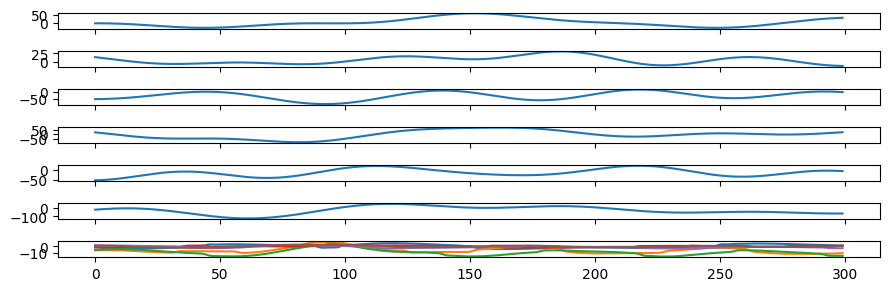

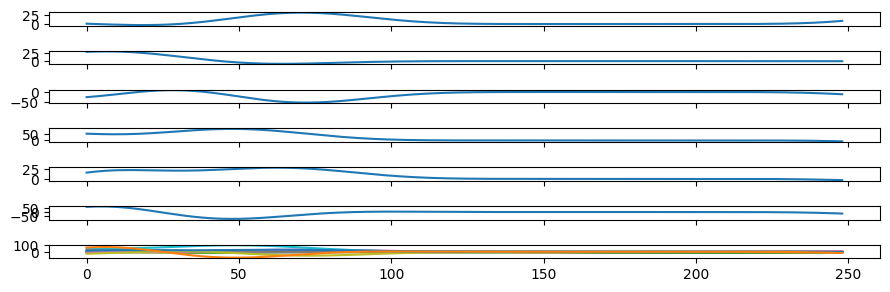

In [ ]:
dls = create_dls_robot_forward()
dls.show_batch(max_n=1)
dls = create_dls_robot_forward_prediction()
dls.show_batch(max_n=1)

In [ ]:
#| export
create_dls_robot_inverse = partial(
    create_dls_downl, 
    download_function=idb.datasets.industrial_robot.dl_robot_inverse,
    u=robot_u_inverse,y=robot_y,
    win_sz=300,
    valid_stp_sz=4,
)

create_dls_robot_inverse_prediction = partial(
    create_dls_downl, 
    download_function=idb.datasets.industrial_robot.dl_robot_inverse,
    u=robot_u_inverse,y=robot_y,
    win_sz=250,
    valid_stp_sz=4,
    prediction=True
)

Dataset not found. Downloading it to "/Users/daniel/.tsfast/datasets/dl_robot_inverse"


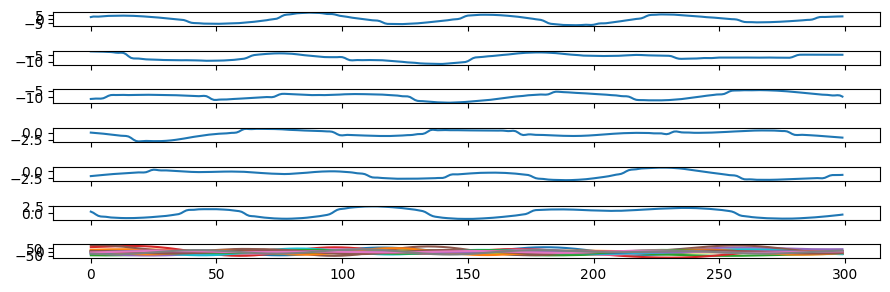

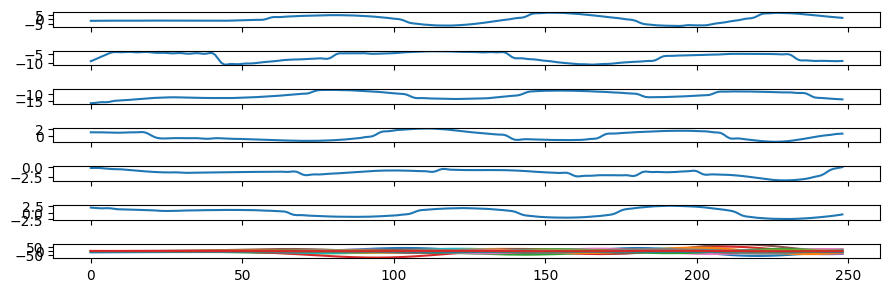

In [ ]:
dls = create_dls_robot_inverse()
dls.show_batch(max_n=1)
dls = create_dls_robot_inverse_prediction()
dls.show_batch(max_n=1)

### Ship Benchmark Dataset

In [ ]:
#| export
ship_u = ['n','deltal','deltar','Vw']
ship_y = ['alpha_x','alpha_y','u','v','p','r','phi']

create_dls_ship = partial(
    create_dls_downl, 
    download_function=idb.datasets.ship.dl_ship,
    u=ship_u,y=ship_y,
    win_sz=100,
)

create_dls_ship_prediction = partial(
    create_dls_downl, 
    download_function=idb.datasets.ship.dl_ship,
    u=ship_u,y=ship_y,
    win_sz=100,
    prediction=True
)

Dataset not found. Downloading it to "/Users/daniel/.tsfast/datasets/dl_ship"


/Users/daniel/Development/tsfast/.venv/lib/python3.10/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

🎉 Connected to 'https://darus.uni-stuttgart.de/'

Fetching dataset 'doi:10.18419/darus-2905' from 'https://darus.uni-stuttgart.de/'

╭────────────────────────────────────────── Dataset Information ──────────────────────────────────────────╮
│ Title: A Simulated 4-DOF Ship Motion Dataset for System Identification under Environmental Disturbances │
│ Version: latest                                                                                         │
│ Files: 126                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Downloading files

╰── ✅ Done 

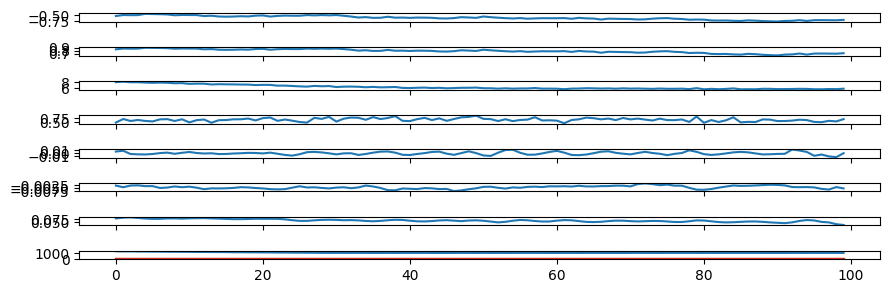

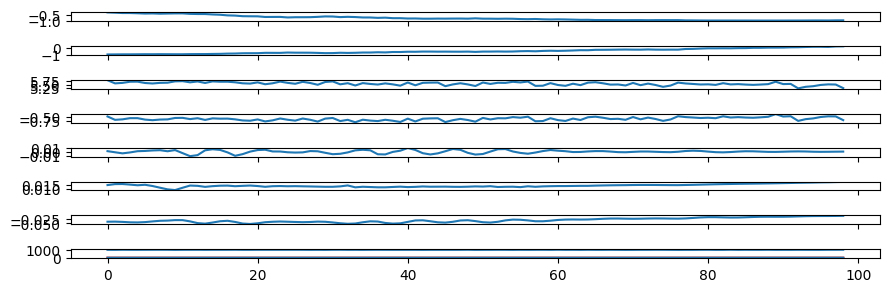

In [ ]:
dls = create_dls_ship()
dls.show_batch(max_n=1)
dls = create_dls_ship_prediction()
dls.show_batch(max_n=1)

### Quadrotor Pelican Dataset

In [ ]:
#| exporti
pelican_u_motors = [f'motors{i}' for i in range(1,4+1)]
pelican_u_motors_cmd = [f'motors_cmd{i}' for i in range(1,4+1)]
pelican_y_euler = [f'euler{i}' for i in range(1,3+1)]
pelican_y_euler_rates = [f'euler_rates{i}' for i in range(1,3+1)]
pelican_y_pos = [f'pos{i}' for i in range(1,3+1)]
pelican_y_vel = [f'vel{i}' for i in range(1,3+1)]
pelican_y_rate = [f'pqr{i}' for i in range(1,3+1)]

In [ ]:
#| export
create_dls_quad_pelican = partial(
    create_dls_downl, 
    download_function=idb.datasets.quad_pelican.dl_quad_pelican,
    u=pelican_u_motors,y=pelican_y_euler_rates+pelican_y_vel,
    win_sz=300,
    valid_stp_sz=40
)

create_dls_quad_pelican_prediction = partial(
    create_dls_downl, 
    download_function=idb.datasets.quad_pelican.dl_quad_pelican,
    u=pelican_u_motors,y=pelican_y_euler_rates+pelican_y_vel,
    win_sz=300,
    valid_stp_sz=40,
    prediction=True
)

Dataset not found. Downloading it to "/Users/daniel/.tsfast/datasets/dl_quad_pelican"


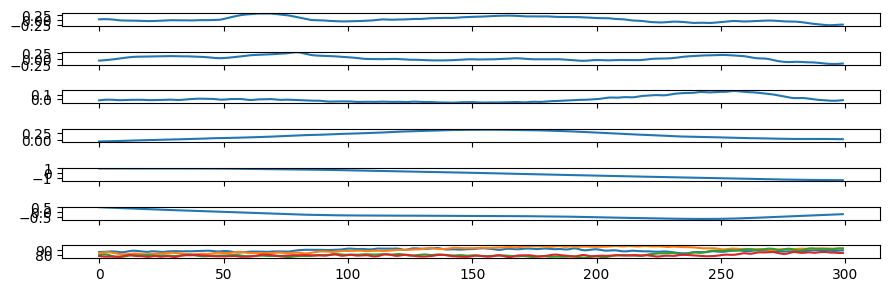

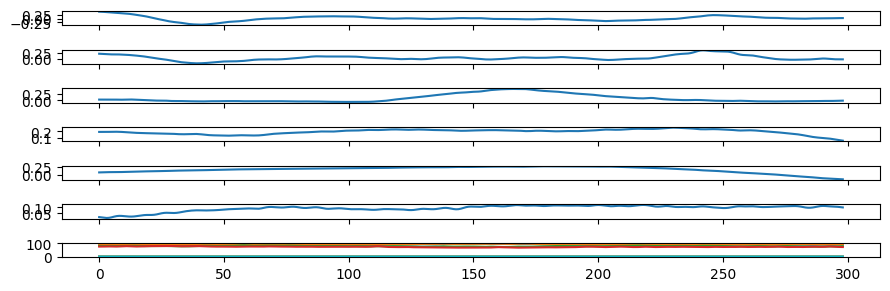

In [ ]:
dls = create_dls_quad_pelican()
dls.show_batch(max_n=1)
dls = create_dls_quad_pelican_prediction()
dls.show_batch(max_n=1)

### Quadrotor PI Dataset

In [ ]:
#| export
quad_pi_u = ['u_0','u_1','u_2','u_3']

quad_pi_x_v = ['v_x','v_y','v_z']
quad_pi_x_q = ['q_w','q_x','q_y','q_z']
quad_pi_x_w = ['w_x','w_y','w_z']
quad_pi_x = quad_pi_x_v + quad_pi_x_q + quad_pi_x_w

quad_pi_y_vdot = ['vdot_x','vdot_y','vdot_z']
quad_pi_y_wdot = ['wdot_x','wdot_y','wdot_z']
quad_pi_y = quad_pi_y_vdot + quad_pi_y_wdot

In [ ]:
#| export
create_dls_quad_pi = partial(
    create_dls_downl, 
    download_function=idb.datasets.quad_pi.dl_quad_pi,
    u=quad_pi_u,y=quad_pi_y,
    win_sz=200,
    valid_stp_sz=20,
)

create_dls_quad_pi_prediction = partial(
    create_dls_downl, 
    download_function=idb.datasets.quad_pi.dl_quad_pi,
    u=quad_pi_u,y=quad_pi_y,
    win_sz=120,
    valid_stp_sz=20,
    prediction=True
)

Dataset not found. Downloading it to "/Users/daniel/.tsfast/datasets/dl_quad_pi"


File exists: /Users/daniel/Library/Application Support/nonlinear_benchmarks/Quadrotor_pi/bags.zip


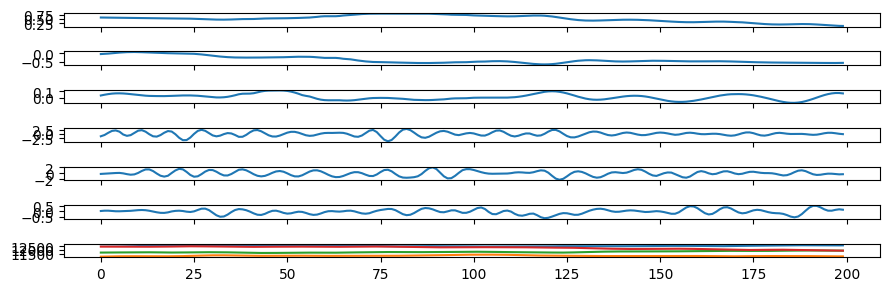

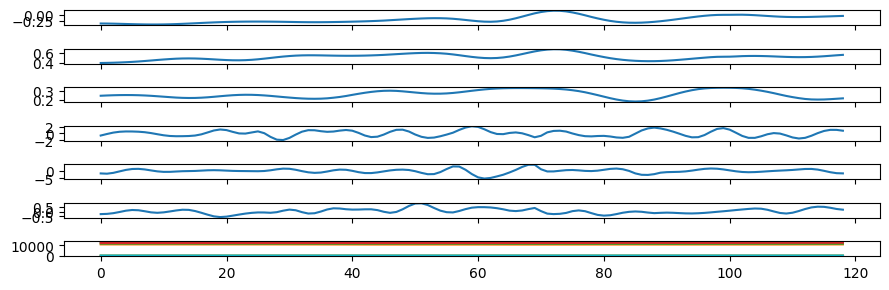

In [ ]:
dls = create_dls_quad_pi()
dls.show_batch(max_n=1)
dls = create_dls_quad_pi_prediction()
dls.show_batch(max_n=1)

### BROAD Dataset

In [ ]:
#| export
broad_u_imu_acc = [f'imu_acc{i}' for i in range(3)]
broad_u_imu_gyr = [f'imu_gyr{i}' for i in range(3)]
broad_u_imu_mag = [f'imu_mag{i}' for i in range(3)]
broad_y_opt_pos = [f'opt_pos{i}' for i in range(4)]
broad_y_opt_quat = [f'opt_quat{i}' for i in range(4)]

broad_u = broad_u_imu_acc+broad_u_imu_gyr

In [ ]:
#| export
create_dls_broad = partial(
    create_dls_downl, 
    download_function=idb.datasets.broad.dl_broad,
    u=broad_u,y=broad_y_opt_quat,
    win_sz=100,
)

create_dls_broad_prediction = partial(
    create_dls_downl, 
    download_function=idb.datasets.broad.dl_broad,
    u=broad_u,y=broad_y_opt_quat,
    win_sz=100,
    prediction=True
)

Dataset not found. Downloading it to "/Users/daniel/.tsfast/datasets/dl_broad"


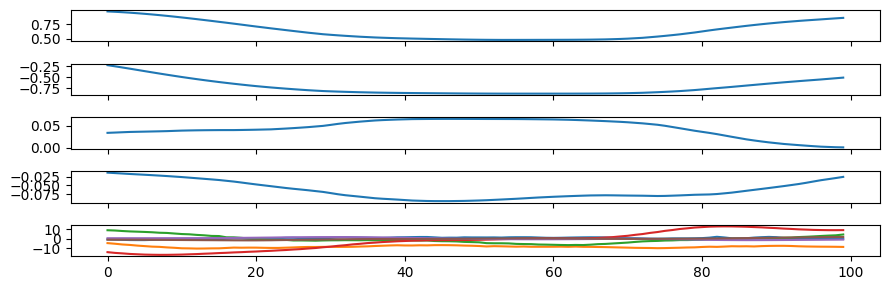

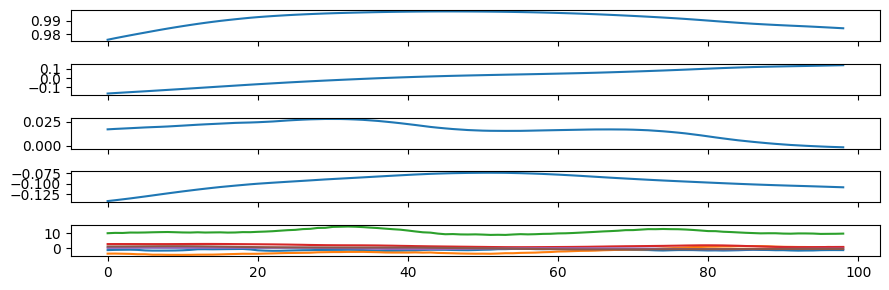

In [ ]:
dls = create_dls_broad()
dls.show_batch(max_n=1)
dls = create_dls_broad_prediction()
dls.show_batch(max_n=1)

## All datasets

In [ ]:
#| export
external_datasets_simulation = [
    create_dls_wh,
    create_dls_silverbox,
    create_dls_robot_forward,
    create_dls_noisy_wh,
    create_dls_ced,
    # create_dls_broad,
    create_dls_emps
]

In [ ]:
#| export
external_datasets_prediction = [
    # create_dls_broad_prediction,
    create_dls_cascaded_tanks_prediction,
    create_dls_emps_prediction,
    create_dls_ced_prediction,
    create_dls_noisy_wh_prediction,
    create_dls_quad_pelican_prediction,
    create_dls_quad_pi_prediction,
    create_dls_robot_forward_prediction,
    create_dls_robot_inverse_prediction,
    create_dls_ship_prediction,
    create_dls_silverbox_prediction,
    create_dls_wh_prediction
]

In [ ]:
#| hide
#os.remove('dls_normalize.p')
#clean_default_dataset_path()

In [ ]:
#| include: false
import nbdev; nbdev.nbdev_export()